# Student Info

## Name: Arvin Esmaili
## ID: 99112114
## Email: arvin_esmaili@gmail.com & arvinismaili@gmail.com

This exercise has been done using hints and some code snippets from GeoSpatial_data python notebook.
Some small hints and helps from documentations of libraries and stackoverflow were used during the implementation of notebook which all have been mentioned and their sources have been provided in their respective sections. Datasets which have been used in this notebook are provided alongside it and their sources are provided.

# 1. Import Libraries

In [1]:
from math import sin, cos, sqrt, atan2, radians
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import Point, Polygon
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, Circle, Marker, Icon, GeoJson
from folium.plugins import HeatMap, MarkerCluster

### Section Info

The following code is written in Python 3.7. Some libraries like geopandas are only installable for Python 3.7. Using Anaconda Environment eases the process of installing geopandas, fiona and GDAL but pip also works as well.

# 2. Import Data

## 2.1. Tehran Earthquake Dataset

### 2.1.1. Read Data From Text File

In [2]:
df_tehran = pd.read_csv('Earthquake_Tehran.txt', delimiter = "\t")
df_tehran.head()

DATE-TIME Latitude Longitude Depth Magnitude
0  yyyy-mm-dd_hh:mm:ss  degrees   degrees    km        MI
1  2020-06-02_09:15:51   35.784    52.045  12.1       2.9
2  2020-06-01_14:21:16   35.785    52.013  10.6       2.6
3  2020-06-01_11:13:54   37.244    53.975  10.0       2.6
4  2020-06-01_01:04:36   35.631    52.622   9.2       2.9

### 2.1.2. Remove First Row

In [3]:
df_tehran = df_tehran.drop(0)
df_tehran.head()

DATE-TIME Latitude Longitude Depth Magnitude
1  2020-06-02_09:15:51   35.784    52.045  12.1       2.9
2  2020-06-01_14:21:16   35.785    52.013  10.6       2.6
3  2020-06-01_11:13:54   37.244    53.975  10.0       2.6
4  2020-06-01_01:04:36   35.631    52.622   9.2       2.9
5  2020-05-31_01:38:48   36.417    51.320  15.4       3.0

### 2.1.3. DateTime Format Correction

In [4]:
date_time_final_list = []
for i in df_tehran['DATE-TIME']:
    date_time_split_list = i.split("_")
    date_time_final_list.append(date_time_split_list[0] + "-" + date_time_split_list[1])
df_tehran["DATE-TIME"] = date_time_final_list

### 2.1.4. Data Types Correction

In [5]:
df_tehran = df_tehran.astype({'DATE-TIME': 'datetime64','Latitude': 'float', 'Longitude': 'float', 'Depth': 'float', 'Magnitude': 'float'})

### 2.1.5. Check Dataset Informations

In [6]:
df_tehran.head()

DATE-TIME  Latitude  Longitude  Depth  Magnitude
1 2020-06-02 09:15:51    35.784     52.045   12.1        2.9
2 2020-06-01 14:21:16    35.785     52.013   10.6        2.6
3 2020-06-01 11:13:54    37.244     53.975   10.0        2.6
4 2020-06-01 01:04:36    35.631     52.622    9.2        2.9
5 2020-05-31 01:38:48    36.417     51.320   15.4        3.0

In [7]:
df_tehran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1 to 46
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE-TIME  46 non-null     datetime64[ns]
 1   Latitude   46 non-null     float64       
 2   Longitude  46 non-null     float64       
 3   Depth      46 non-null     float64       
 4   Magnitude  46 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.2 KB


In [8]:
df_tehran.describe()

Latitude  Longitude      Depth  Magnitude
count  46.000000  46.000000  46.000000  46.000000
mean   35.842761  51.878283   9.939130   2.941304
std     0.660042   0.862503   2.319145   0.494223
min    34.479000  50.121000   5.000000   2.500000
25%    35.762750  51.993250   8.000000   2.600000
50%    35.781500  52.034000  10.000000   2.800000
75%    35.894000  52.058250  11.850000   3.000000
max    37.586000  53.975000  16.000000   5.100000

### Section Info

In this section Data for earthquakes that have been collected by Tehran subnetwork station are read and imported for furhter processing. Following actions have been done for importing and fixing datasets:

- Read Data From its respective text file with Tab delimiter
- Remove first row of dataset which contains unit for each column
- Reformat date data to interpretebale type by python and pandas
- Fix datatype for all columns which is essential for future sections of this notebook
- Check informations of dataset that might be helpful with learning dataset characteristics

## 2.2. Qazvin Earthquake Dataset

### 2.2.1. Read Data From Text File

In [9]:
df_qazvin = pd.read_csv('Earthquake_Qazvin.txt', delimiter = "\t")
df_qazvin.head()

DATE-TIME Latitude Longitude Depth Magnitude
0  yyyy-mm-dd_hh:mm:ss  degrees   degrees    km        MI
1  2020-06-02_12:05:04   36.589    50.226   8.0       2.8
2  2020-06-02_09:15:51   35.784    52.045  12.1       2.9
3  2020-06-01_22:50:10   36.694    49.788  14.9       2.9
4  2020-06-01_14:21:16   35.785    52.013  10.6       2.6

### 2.2.2. Remove First Row

In [10]:
df_qazvin = df_qazvin.drop(0)
df_qazvin.head()

DATE-TIME Latitude Longitude Depth Magnitude
1  2020-06-02_12:05:04   36.589    50.226   8.0       2.8
2  2020-06-02_09:15:51   35.784    52.045  12.1       2.9
3  2020-06-01_22:50:10   36.694    49.788  14.9       2.9
4  2020-06-01_14:21:16   35.785    52.013  10.6       2.6
5  2020-05-31_01:38:48   36.417    51.320  15.4       3.0

### 2.2.3. DateTime Format Correction

In [11]:
date_time_final_list = []
for i in df_qazvin['DATE-TIME']:
    date_time_split_list = i.split("_")
    date_time_final_list.append(date_time_split_list[0] + "-" + date_time_split_list[1])
df_qazvin["DATE-TIME"] = date_time_final_list

### 2.2.4. Data Types Correction

In [12]:
df_qazvin = df_qazvin.astype({'DATE-TIME': 'datetime64','Latitude': 'float', 'Longitude': 'float', 'Depth': 'float', 'Magnitude': 'float'})

### 2.2.5. Check Dataset Informations

In [13]:
df_qazvin.head()

DATE-TIME  Latitude  Longitude  Depth  Magnitude
1 2020-06-02 12:05:04    36.589     50.226    8.0        2.8
2 2020-06-02 09:15:51    35.784     52.045   12.1        2.9
3 2020-06-01 22:50:10    36.694     49.788   14.9        2.9
4 2020-06-01 14:21:16    35.785     52.013   10.6        2.6
5 2020-05-31 01:38:48    36.417     51.320   15.4        3.0

In [14]:
df_qazvin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 1 to 41
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE-TIME  41 non-null     datetime64[ns]
 1   Latitude   41 non-null     float64       
 2   Longitude  41 non-null     float64       
 3   Depth      41 non-null     float64       
 4   Magnitude  41 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 KB


In [15]:
df_qazvin.describe()

Latitude  Longitude      Depth  Magnitude
count  41.000000  41.000000  41.000000  41.000000
mean   36.060756  51.347927  10.304878   2.914634
std     0.691855   1.169600   2.193963   0.484025
min    34.781000  48.246000   6.400000   2.500000
25%    35.776000  50.625000   8.000000   2.600000
50%    35.783000  52.021000  10.000000   2.800000
75%    36.430000  52.042000  12.000000   2.900000
max    38.210000  52.215000  15.400000   5.000000

### Section Info

Steps in this section are as same as Section 2.1.

## 2.3. Tehran and Qazvin Stations Dataset

### 2.3.1. Create Dataset Column Label Row

In [16]:
stations_columns_labels = ['Station Code', 'Station Name', 'SubNetwork', 'Latitude', 'Longitude', 'Altitude']
stations_columns_labels

['Station Code',
 'Station Name',
 'SubNetwork',
 'Latitude',
 'Longitude',
 'Altitude']

### 2.3.2. Create Tehran Stations Information Lists

In [17]:
tehran_stations = ['DMV', 'FIR', 'GZV', 'HSB', 'MHD', 'QOM', 'RAZ', 'SFB', 'TEH', 'VRN', 'TEHA']
tehran_names = ['Damavand', 'Firuzkuh', 'Qazvin', 'HasanAbad', 'Mahdasht', 'Qom', 'Razeqan', 'Sefidab', 'Tehran', 'Varamin', 'AmirAbad']
tehran_latitudes = [35.577, 35.642, 36.386, 35.438, 35.685, 34.842, 35.405, 34.352, 35.752, 34.995, 35.746]
tehran_longitudes = [52.032, 52.754, 50.218, 51.276, 50.667, 51.063, 49.929, 52.241, 51.389, 51.727, 51.387]
tehran_altitudes = [2546, 2380, 2458, 1138, 1658, 1000, 1950, 995, 1458, 1139, 1418]

### 2.3.3. Create Qazvin Stations Information Lists

In [18]:
qazvin_stations = ['QABG', 'QALM', 'QCNT', 'QSDN']
qazvin_names = ['Abgarm', 'Alamut', 'Center', 'Sirdan']
qazvin_latitudes = [35.708, 36.432, 36.29, 36.504]
qazvin_longitudes = [49.582, 50.646, 50.009, 49.174]
qazvin_altitudes = [2085, 2212, 1319, 2148]

### 2.3.4. Create Stations Dataset Data Matrix

In [19]:
station_data_matrix = []

# add tehran stations to stations data matrix
for i in range(0,len(tehran_stations)):
    station_data_matrix.append([tehran_stations[i], tehran_names[i], "Tehran", tehran_latitudes[i], tehran_longitudes[i], tehran_altitudes[i]])

# add qazvin stations to stations data matrix
for i in range(0,len(qazvin_stations)):
    station_data_matrix.append([qazvin_stations[i], qazvin_names[i], "Qazvin", qazvin_latitudes[i], qazvin_longitudes[i], qazvin_altitudes[i]])

station_data_matrix

[['DMV', 'Damavand', 'Tehran', 35.577, 52.032, 2546],
 ['FIR', 'Firuzkuh', 'Tehran', 35.642, 52.754, 2380],
 ['GZV', 'Qazvin', 'Tehran', 36.386, 50.218, 2458],
 ['HSB', 'HasanAbad', 'Tehran', 35.438, 51.276, 1138],
 ['MHD', 'Mahdasht', 'Tehran', 35.685, 50.667, 1658],
 ['QOM', 'Qom', 'Tehran', 34.842, 51.063, 1000],
 ['RAZ', 'Razeqan', 'Tehran', 35.405, 49.929, 1950],
 ['SFB', 'Sefidab', 'Tehran', 34.352, 52.241, 995],
 ['TEH', 'Tehran', 'Tehran', 35.752, 51.389, 1458],
 ['VRN', 'Varamin', 'Tehran', 34.995, 51.727, 1139],
 ['TEHA', 'AmirAbad', 'Tehran', 35.746, 51.387, 1418],
 ['QABG', 'Abgarm', 'Qazvin', 35.708, 49.582, 2085],
 ['QALM', 'Alamut', 'Qazvin', 36.432, 50.646, 2212],
 ['QCNT', 'Center', 'Qazvin', 36.29, 50.009, 1319],
 ['QSDN', 'Sirdan', 'Qazvin', 36.504, 49.174, 2148]]

### 2.3.5. Create Stations DataFrame

In [20]:
df_stations = pd.DataFrame(station_data_matrix, columns = stations_columns_labels)

### 2.3.6. Check Dataset Informations

In [21]:
df_stations.head(df_stations.shape[0])

Station Code Station Name SubNetwork  Latitude  Longitude  Altitude
0           DMV     Damavand     Tehran    35.577     52.032      2546
1           FIR     Firuzkuh     Tehran    35.642     52.754      2380
2           GZV       Qazvin     Tehran    36.386     50.218      2458
3           HSB    HasanAbad     Tehran    35.438     51.276      1138
4           MHD     Mahdasht     Tehran    35.685     50.667      1658
5           QOM          Qom     Tehran    34.842     51.063      1000
6           RAZ      Razeqan     Tehran    35.405     49.929      1950
7           SFB      Sefidab     Tehran    34.352     52.241       995
8           TEH       Tehran     Tehran    35.752     51.389      1458
9           VRN      Varamin     Tehran    34.995     51.727      1139
10         TEHA     AmirAbad     Tehran    35.746     51.387      1418
11         QABG       Abgarm     Qazvin    35.708     49.582      2085
12         QALM       Alamut     Qazvin    36.432     50.646      2212
13         QCNT       Center     Qazvin    36.290     50.009      1319
14         QSDN       Sirdan     Qazvin    36.504     49.174      2148

In [22]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Station Code  15 non-null     object 
 1   Station Name  15 non-null     object 
 2   SubNetwork    15 non-null     object 
 3   Latitude      15 non-null     float64
 4   Longitude     15 non-null     float64
 5   Altitude      15 non-null     int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 848.0+ bytes


In [23]:
df_stations.describe()

Latitude  Longitude     Altitude
count  15.000000  15.000000    15.000000
mean   35.650267  50.939600  1726.933333
std     0.609062   1.030205   555.361847
min    34.352000  49.174000   995.000000
25%    35.421500  50.113500  1229.000000
50%    35.685000  51.063000  1658.000000
75%    36.021000  51.558000  2180.000000
max    36.504000  52.754000  2546.000000

### Section Info

This section is created to provide information of stations for furthur usages in notebook. No CSV or TXT files were provided for this file but a table of information have been provided in this link: http://irsc.ut.ac.ir/english_txt/Sub%20Network.htm

Following actions have been done to provide stations data:

- Data have been acquired manually from provided link
- Create a row for dataset column headers
- Create Tehran subnetwork stations dataset from manually acquired data
- Create Qazvin subnetwork stations dataset from manually acquired data
- Create stations data matrix out of datasets of Tehran and Qazvin subnetworks
- Create dataframe for stations using stations data matrix and column headers
- Check informations of dataset that might be helpful with learning dataset characteristics

# 3. Plot Desired Normal Maps (Marker Maps)

## 3.1. Plot Earthquakes and Stations Data Points

### 3.1.1. Desired Area Map

In [24]:
map_1 = folium.Map(location=[36,51], tiles='Stamen Terrain', zoom_start=7)
map_1

### Section Info

#### Map Info

Basic terrain map of Tehran and Qazvin Province

### 3.1.2. Station Locations

In [25]:
def color_producer(val):
    if val == 'Tehran':
        return 'blue'
    elif val == 'Qazvin':
        return 'red'
    else:
        return 'black'

In [26]:
def PlotStations(Map, province='all'):
    if(province == 'all'):
        stations = df_stations
    else:
        stations = df_stations[df_stations['SubNetwork'] == province]
    
    for station in stations.values:
        popup_text = '<b>Station: </b>' + station[0] + '</br>' \
        + '<b>Name: </b>' + station[1] + '</br>' \
        + '<b>SubNetwork: </b>' + station[2] + '</br>' \
        + '<b>Latitude: </b>' + str(station[3]) + '</br>' \
        + '<b>Longitude: </b>' + str(station[4]) + '</br>' \
        + '<b>Altitude: </b>' + str(station[5])
        folium.Marker(
            [station[3], station[4]], popup=popup_text , tooltip=station[1], icon=folium.Icon(color=color_producer(station[2]), icon='signal')
        ).add_to(Map)


In [27]:
map_2 = folium.Map(location=[36,51], tiles='Stamen Terrain', zoom_start=7)

PlotStations(map_2)

map_2

### Section Info
This section has two defined methods:

- color_producer that generates color based on subnetwork info which is either Tehran or Qazvin 
- PlotStations which plots stations using their coordinations, as markers with signal icon and their respective color

PlotStations have been used in combination of terrain map to represent stations' positions on terrain map

#### Map Info

- Stations are Plotted as markers with signal icons
- Each marker has either red or blue color
- Blue marker stations are connected to Tehran subnetwork and red marker stations are connected to Qazvin subnetwork
- Hovering over markers provide the stations' real names and clicking on them opens their complete info pop-up


### 3.1.3. Earthquake Locations

In [28]:
def PlotEarthquakes(Map):
    for EQ in df_tehran.values:
        popup_text = '<b>Latitude: </b>' + str(EQ[1]) + '</br>' \
        + '<b>Longitude: </b>' + str(EQ[2]) + '</br>' \
        + '<b>Depth: </b>' + str(EQ[3]) + '</br>' \
        + '<b>Magnitude: </b>' + str(EQ[4])
        folium.CircleMarker(
            [EQ[1], EQ[2]], popup=popup_text , tooltip="Tehran Earthquake", color="blue", radius=EQ[4]*4
        ).add_to(Map)

    for EQ in df_qazvin.values:
        popup_text = '<b>Latitude: </b>' + str(EQ[1]) + '</br>' \
        + '<b>Longitude: </b>' + str(EQ[2]) + '</br>' \
        + '<b>Depth: </b>' + str(EQ[3]) + '</br>' \
        + '<b>Magnitude: </b>' + str(EQ[4])
        folium.CircleMarker(
            [EQ[1], EQ[2]], popup=popup_text , tooltip="Qazvin Earthquake", color="red", radius=EQ[4]*4
        ).add_to(Map)

In [29]:
map_3 = folium.Map(location=[36,51], tiles='Stamen Terrain', zoom_start=7)

PlotEarthquakes(map_3)

map_3

### Section Info
This section has a defined method:

- PlotEarthquakes which plots earthquakes using their coordinations, as circles with their respective color 

PlotEarthquakes have been used in combination of terrain map to represent Earthquakes' positions on terrain map

#### Map Info

- Earthquakes are Plotted as circles
- Each circle has either red or blue color
- Each circle's radius is based on their magnitude multiplied by 4 for better demostration
- Blue circle earthquakes are represented from Tehran's dataset and red circle earthquakes are represented from Qazvin's dataset
- Hovering over markers provide the earthquakes' dataset name and clicking on them opens their complete info pop-up


### 3.1.4. Station Locations + Earthquake Locations

In [30]:
map_4 = folium.Map(location=[36,51], tiles='Stamen Terrain', zoom_start=7)

PlotStations(map_4)
PlotEarthquakes(map_4)

map_4

### Section Info

PlotEarthquakes and PlotStations have been used in combination of terrain map to represent Earthquakes' and stations' positions on terrain map

#### Map Info

- All infos from sections 3.1.1, 3.1.2 and 3.1.3 apply on this map


## 3.2. Closest Station to Each Eartquake Location

### 3.2.1. Define Distance Method

https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

In [31]:
def GetDistance(latA, lonA, latB, lonB):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(latA)
    lon1 = radians(lonA)
    lat2 = radians(latB)
    lon2 = radians(lonB)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance


### Section Info

This sections has the following defined method:

- GetDistance method takes latitude and longitude of two points and return their distance on earth with good accuracy

For this section, a stackoverflow post has been used. The method was copied from this post and modified to match the needs in this notebook.

Link to the mentioned stackoverflow post:

https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

### 3.2.2 Combine All Earthquake Datasets

In [32]:
df_tehran_modified = df_tehran.copy()
df_tehran_modified['Dataset'] = 'Tehran'
df_qazvin_modified = df_qazvin.copy()
df_qazvin_modified['Dataset'] = 'Qazvin'

In [33]:
df_all = df_tehran_modified.append(df_qazvin_modified)
df_all = df_all.reset_index()
df_all = df_all.drop(columns=["index"])
df_all

DATE-TIME  Latitude  Longitude  Depth  Magnitude Dataset
0  2020-06-02 09:15:51    35.784     52.045   12.1        2.9  Tehran
1  2020-06-01 14:21:16    35.785     52.013   10.6        2.6  Tehran
2  2020-06-01 11:13:54    37.244     53.975   10.0        2.6  Tehran
3  2020-06-01 01:04:36    35.631     52.622    9.2        2.9  Tehran
4  2020-05-31 01:38:48    36.417     51.320   15.4        3.0  Tehran
..                 ...       ...        ...    ...        ...     ...
82 2020-05-07 20:42:05    35.765     52.015   11.4        2.5  Qazvin
83 2020-05-07 20:18:21    35.776     52.046   10.7        5.0  Qazvin
84 2020-05-07 19:00:16    35.784     52.038   10.0        2.9  Qazvin
85 2020-05-07 13:45:02    36.886     49.221   10.0        2.9  Qazvin
86 2020-05-05 08:18:46    37.244     48.684   10.0        2.7  Qazvin

[87 rows x 6 columns]

### Section Info

In order get distances of each station from each eathquake point, all the earthquake points must gather in one dataset. Here the process is done by combining two dataframes into one data frame that contains all earthquake points

### 3.2.3 Get Distances Between Each Station and Earthquake

In [34]:
distance_matrix = []

for i in df_all.values:
    
    distance_row = []
    
    for j in df_stations.values:
        
        distance_row.append(GetDistance(i[1], i[2], j[3], j[4]))
    
    distance_matrix.append(distance_row)

distance_matrix = np.array(distance_matrix)
    
distance_matrix

array([[ 23.05451452,  65.95112309, 177.35069288, ..., 144.91247368,
        191.57628942, 270.01566566],
       [ 23.19940365,  68.78573067, 174.64709739, ..., 142.3681259 ,
        188.79292831, 267.23754474],
       [254.21557716, 209.01159185, 347.86954879, ..., 309.78783306,
        368.93799839, 434.99398799],
       ...,
       [ 23.03095629,  66.56508559, 176.76822891, ..., 144.36711891,
        190.97458859, 269.41534232],
       [291.19870539, 345.72008005, 104.93637524, ..., 136.81004906,
         96.68278255,  42.69606279],
       [352.38471031, 405.38247385, 166.63104443, ..., 196.62363483,
        158.73762255,  93.14403887]])

In [35]:
distance_matrix.shape

(87, 15)

In [36]:
distance_matrix_df = pd.DataFrame(distance_matrix, columns = df_stations['Station Code'])
distance_matrix_df

Station Code         DMV         FIR         GZV         HSB         MHD  \
0              23.054515   65.951123  177.350693   79.478498  124.903283   
1              23.199404   68.785731  174.647097   77.014768  122.034955   
2             254.215577  209.011592  347.869549  314.346290  342.945960   
3              53.694479   11.995335  232.026134  123.708995  176.783182   
4             113.291152  155.142414   98.717875  108.966094  100.387027   
..                   ...         ...         ...         ...         ...   
82             20.967555   68.136877  175.694680   76.090459  122.047678   
83             22.170853   65.658864  177.779326   79.134082  124.924209   
84             23.030956   66.565086  176.768229   78.925260  124.273751   
85            291.198705  345.720080  104.936375  244.929492  186.151128   
86            352.384710  405.382474  166.631044  307.035013  248.052412   

Station Code         QOM         RAZ         SFB         TEH         VRN  \
0             137.558236  195.969785  160.277340   59.311322   92.376087   
1             135.780036  193.167564  160.737995   56.435554   91.618500   
2             374.087926  416.243720  357.678798  284.598065  321.496255   
3             166.616929  245.091660  146.437597  112.195581  107.718177   
4             176.720822  168.442174  244.399150   74.227422  162.383948   
..                   ...         ...         ...         ...         ...   
82            134.192740  192.893104  158.508881   56.522162   89.540774   
83            136.943675  195.878097  159.382996   59.357716   91.560196   
84            137.147447  195.351563  160.349527   58.680720   92.179927   
85            281.515667  176.578267  392.392617  231.640529  308.474426   
86            342.260169  232.994535  454.297318  293.306331  370.543316   

Station Code        TEHA        QABG        QALM        QCNT        QSDN  
0              59.537388  222.503991  144.912474  191.576289  270.015666  
1              56.664979  219.620436  142.368126  188.792928  267.237545  
2             285.139983  428.390498  309.787833  368.937998  434.993988  
3             112.301149  274.824339  198.816662  246.398434  324.837944  
4              74.877832  175.040053   60.345926  118.287224  192.217578  
..                   ...         ...         ...         ...         ...  
82             56.725704  219.752996  143.672664  189.659520  268.113387  
83             59.573937  222.573358  145.440343  191.934287  270.379068  
84             58.907223  221.872568  144.367119  190.974589  269.415342  
85            231.860726  134.965784  136.810049   96.682783   42.696063  
86            293.544826  188.783592  196.623635  158.737623   93.144039  

[87 rows x 15 columns]

### Section Info

In this section distances between stations and earthquake points are acquired and collected into a matrix.
The matrix columns are stations and matrix rows are earthquakes' indexes. Each cell shows the distance between the station in column and earthquake in row.

After the generation of distance matrix it is transformed into a dataframe that station codes are column names and indexes are earthquake indexes.

### 3.2.4 Get Closest Station For Each Earthquake 

In [37]:
minimum_distances = distance_matrix_df.idxmin(axis=1)
minimum_distances

0      DMV
1      DMV
2      FIR
3      FIR
4     QALM
      ... 
82     DMV
83     DMV
84     DMV
85    QSDN
86    QSDN
Length: 87, dtype: object

In [38]:
minimum_distances = pd.DataFrame(minimum_distances)
minimum_distances = minimum_distances.rename({0 : "Nearest Station"}, axis = 1)
minimum_distances

Nearest Station
0              DMV
1              DMV
2              FIR
3              FIR
4             QALM
..             ...
82             DMV
83             DMV
84             DMV
85            QSDN
86            QSDN

[87 rows x 1 columns]

In [39]:
print("stations containing at least an earthquake: ")
print(np.unique(minimum_distances))
print()
print("number of stations containing at least an earthquake: ")
print(len(np.unique(minimum_distances)))

stations containing at least an earthquake: 
['DMV' 'FIR' 'GZV' 'QABG' 'QALM' 'QCNT' 'QOM' 'QSDN' 'RAZ' 'TEH']

number of stations containing at least an earthquake: 
10


#### Add Closest Station For Each Earthquake to its row in All Earthquakes Dataset 

In [40]:
df_all_final = df_all.copy()
df_all_final["Nearest Station"] = minimum_distances["Nearest Station"]
df_all_final

DATE-TIME  Latitude  Longitude  Depth  Magnitude Dataset  \
0  2020-06-02 09:15:51    35.784     52.045   12.1        2.9  Tehran   
1  2020-06-01 14:21:16    35.785     52.013   10.6        2.6  Tehran   
2  2020-06-01 11:13:54    37.244     53.975   10.0        2.6  Tehran   
3  2020-06-01 01:04:36    35.631     52.622    9.2        2.9  Tehran   
4  2020-05-31 01:38:48    36.417     51.320   15.4        3.0  Tehran   
..                 ...       ...        ...    ...        ...     ...   
82 2020-05-07 20:42:05    35.765     52.015   11.4        2.5  Qazvin   
83 2020-05-07 20:18:21    35.776     52.046   10.7        5.0  Qazvin   
84 2020-05-07 19:00:16    35.784     52.038   10.0        2.9  Qazvin   
85 2020-05-07 13:45:02    36.886     49.221   10.0        2.9  Qazvin   
86 2020-05-05 08:18:46    37.244     48.684   10.0        2.7  Qazvin   

   Nearest Station  
0              DMV  
1              DMV  
2              FIR  
3              FIR  
4             QALM  
..             ...  
82             DMV  
83             DMV  
84             DMV  
85            QSDN  
86            QSDN  

[87 rows x 7 columns]

### Section Info

Following actions take place in this section:

- Search for the nearest station to each earthquake point
- Check the number of stations containing at least and earthquake (useful in future)
- Add closest station for each earthquake point to its row in all earthquakes dateset

As it's represented there are only 10 stations with at least one closest earthquake point

### 3.2.5 Define Method For Returning a Color Based On Station Code

In [41]:
def color_definer(StationName):

    dict_station_color = {'DMV': 'lightgray' , 'FIR': 'lightblue' , 'GZV': 'beige' , 'HSB': 'cadetblue' , 'MHD': 'lightred' \
                          , 'QOM': 'gray' , 'RAZ': 'black', 'SFB': 'lightgreen' , 'TEH': 'blue' , 'VRN': 'green' \
                          , 'TEHA': 'purple' , 'QABG': 'pink', 'QALM': 'orange' , 'QCNT': 'red' , 'QSDN': 'darkred'}
    
    return dict_station_color[StationName]

### Section Info

This section contains a defined method:

- color_definer method which returns color based on station code

Using this method visualizes the relation of each earthquake point to its closest station.

### 3.2.6 Draw The Map Of Closest Station To Each Eartquake Location

In [42]:
map_5 = folium.Map(location=[36,51], tiles='Stamen Terrain', zoom_start=7)


for station in df_stations.values:
    
        popup_text = '<b>Station: </b>' + station[0] + '</br>' \
        + '<b>Name: </b>' + station[1] + '</br>' \
        + '<b>SubNetwork: </b>' + station[2] + '</br>' \
        + '<b>Latitude: </b>' + str(station[3]) + '</br>' \
        + '<b>Longitude: </b>' + str(station[4]) + '</br>' \
        + '<b>Altitude: </b>' + str(station[5])
        
        folium.Marker(
            [station[3], station[4]], popup=popup_text , tooltip=station[1], icon=folium.Icon(color=color_definer(station[0]), icon='signal')
        ).add_to(map_5)

        
for EQ in df_all_final.values:

    latEQ = EQ[1]
    longEQ = EQ[2]
    station_code = EQ[6]
    station = df_stations[ df_stations['Station Code'] == station_code]
    latSt = station['Latitude'].values[0]
    longSt = station['Longitude'].values[0]

    loc = [(latEQ, longEQ),(latSt, longSt)]
    
    folium.PolyLine(loc, color=color_definer(station_code), weight=10, opacity=0.8).add_to(map_5)
    

for EQ in df_all_final.values:
    
    popup_text = '<b>Latitude: </b>' + str(EQ[1]) + '</br>' \
    + '<b>Longitude: </b>' + str(EQ[2]) + '</br>' \
    + '<b>Depth: </b>' + str(EQ[3]) + '</br>' \
   + '<b>Magnitude: </b>' + str(EQ[4]) + '</br>' \
    + '<b>Dataset: </b>' + str(EQ[5]) + '</br>' \
    + '<b>Nearest Station: </b>' + str(EQ[6])
    
    folium.CircleMarker(
        [EQ[1], EQ[2]], popup=popup_text , tooltip='<b>Nearest Station: </b>' + str(EQ[6]), color=color_producer(EQ[5]), radius=EQ[4]*4
    ).add_to(map_5)
     

map_5

### Section Info

This section combines the terrain map from 3.1.1 with modified versions of PlotStations and PlotEarthquakes to demonstrate the close station to each earthquake point, better. Also a line with the same color as station is drawn for each point to keep better track of each station for each point.

#### Map Info

- Earthquakes are Plotted as circles
- Each circle has either red or blue color
- Each circle's radius is based on their magnitude multiplied by 4 for better demostration
- Blue circle earthquakes are represented from Tehran's dataset and red circle earthquakes are represented from Qazvin's dataset
- Hovering over markers provide the earthquakes nearest station code and clicking on them opens their complete info pop-up


- Stations are Plotted as markers with signal icons
- Each marker has their unique color based on their code
- each earthquake connected to the station has a line colored as same as the station's
- Hovering over markers provide the stations' real names and clicking on them opens their complete info pop-up

# 4. Plot Desired Heatmaps

<font color='red'>__Note:__</font> In following sections PlotEarthquakes methods are commented for better representation. However uncommenting these lines might be helpful with some details. So feel free to uncomment them if you require to do so.

### 4.1. Plot Magnitude Heatmap

In [43]:
heatmap_1 = folium.Map(location=[36,51], tiles='Stamen Terrain', zoom_start=7)

#PlotEarthquakes(heatmap_1)
PlotStations(heatmap_1)

HeatMap(data = df_all_final[['Latitude', 'Longitude', 'Magnitude']], radius=30, gradient={0.25: 'yellow', 0.5: 'red', 1: 'black'}).add_to(heatmap_1)

heatmap_1

### Section Info

PlotStations have been used in combination of terrain heatmap to represent and stations' positions on terrain heatmap.
Also the heat on this map is based on each earthqaukes' magnitude which means the darker the color, the higher the magnitude is.

#### Map Info

- All infos from sections 3.1.1, 3.1.2 and 3.1.3 apply on this map
- Higher magnitudes are prone to black while lower magnitudes are more prone to yellow

high magnitude earthquakes are located mostly in Damavand district and some took place in Qom district. Beside these two areas, there are some high magnitude earthquakes in Zanjan Province. The other locations have earthquakes with low magnitudes around 2.5 MI. Among all points, Damavand district requires more attention than others.

### 4.2. Plot Depth Heatmap

In [44]:
heatmap_2 = folium.Map(location=[36,51], tiles='Stamen Terrain', zoom_start=7)

#PlotEarthquakes(heatmap_2)
PlotStations(heatmap_2)

HeatMap(data = df_all_final[['Latitude', 'Longitude', 'Depth']], radius=30, gradient={0.25: 'yellow', 0.5: 'red', 1: 'black'}).add_to(heatmap_2)

heatmap_2

### Section Info

PlotStations have been used in combination of terrain heatmap to represent and stations' positions on terrain heatmap.
Also the heat on this map is based on each earthqaukes' depth which means the darker the color, the deeper the earthquake is.

#### Map Info

- All infos from sections 3.1.1, 3.1.2 and 3.1.3 apply on this map
- Higher depths are prone to black color while lower depths are more prone to yellow

high depth earthquakes are located mostly in Damavand district and some took place in Qom district. Beside these two areas, there are some high depth earthquakes in Zanjan Province. The other locations have earthquakes with low depths around 2.19 Km. Among all points, Depth heatmap seems more like magnitude heatmap as you can expect most of high depth earthquakes result in higher magnitudes.

### 4.3. Plot Date-Time Heatmap

In [45]:
df_int_date = df_all_final.copy()

milisecs = []

for i in df_int_date['DATE-TIME']:
    milisecs.append(i.timestamp())

df_int_date['DATE-TIME'] = milisecs
df_int_date

DATE-TIME  Latitude  Longitude  Depth  Magnitude Dataset  \
0   1.591089e+09    35.784     52.045   12.1        2.9  Tehran   
1   1.591021e+09    35.785     52.013   10.6        2.6  Tehran   
2   1.591010e+09    37.244     53.975   10.0        2.6  Tehran   
3   1.590973e+09    35.631     52.622    9.2        2.9  Tehran   
4   1.590889e+09    36.417     51.320   15.4        3.0  Tehran   
..           ...       ...        ...    ...        ...     ...   
82  1.588884e+09    35.765     52.015   11.4        2.5  Qazvin   
83  1.588883e+09    35.776     52.046   10.7        5.0  Qazvin   
84  1.588878e+09    35.784     52.038   10.0        2.9  Qazvin   
85  1.588859e+09    36.886     49.221   10.0        2.9  Qazvin   
86  1.588667e+09    37.244     48.684   10.0        2.7  Qazvin   

   Nearest Station  
0              DMV  
1              DMV  
2              FIR  
3              FIR  
4             QALM  
..             ...  
82             DMV  
83             DMV  
84             DMV  
85            QSDN  
86            QSDN  

[87 rows x 7 columns]

In [46]:
heatmap_3 = folium.Map(location=[36,51], tiles='Stamen Terrain', zoom_start=7)

#PlotEarthquakes(heatmap_2)
PlotStations(heatmap_2)

HeatMap(data = df_int_date[['Latitude', 'Longitude', 'Longitude']], radius=30, gradient={0.25: 'yellow', 0.5: 'red', 1: 'black'}).add_to(heatmap_3)

heatmap_3

### Section Info

In this section, first the date-time column of all earthquakes dataset is changed from time stamp to miliseconds so it will provide same values but in integer form.

PlotStations have been used in combination of terrain heatmap to represent stations' positions on terrain heatmap.
Also the heat on this map is based on each earthqaukes' date-time which means the darker the color, more recent the earthquake is.

#### Map Info

- All infos from sections 3.1.1, 3.1.2 and 3.1.3 apply on this map
- Higher depths are prone to black color while lower depths are more prone to yellow

Recent earthquakes are located mostly in Damavand district, some took place in Qom district and some are located in Caspian Sea in the vicinity of Fereydun Kenar. Beside these areas, some recent earthquakes are in Zanjan Province. This map some how looks like the other two heatmaps but differences are more clear in higher zoom levels.

# 5. Plot Desired Points On Map

<font color='red' weight='bold'>Note: </font> The following sections use geometry shape files of all districts in Iran with 3 levels for __country(level 0)__, __provinces(level 1)__ and __cities (level 2)__. 

These data files are acquired from Iran's shapefile link of this webpage: https://gadm.org/download_country_v3.html

By using these files in sections 5 and 6 we obtain the desired districts for each section.

## 5.1. Plot Points in Tehran Province

In [47]:
districts_full = gpd.read_file('gadm36_IRN_shp/gadm36_IRN_1.shp')
districts = districts_full[["NAME_1", "geometry"]].set_index("NAME_1")
districts

geometry
NAME_1                                                                        
Alborz                       POLYGON ((51.11609 35.61262, 51.10568 35.61502...
Ardebil                      POLYGON ((48.86765 37.32700, 48.87209 37.30809...
Bushehr                      MULTIPOLYGON (((52.67042 27.45958, 52.67042 27...
Chahar Mahall and Bakhtiari  POLYGON ((50.44578 31.39521, 50.41049 31.41390...
East Azarbaijan              POLYGON ((46.41475 37.00500, 46.40373 36.99484...
Esfahan                      POLYGON ((50.36357 32.54826, 50.35197 32.54791...
Fars                         POLYGON ((53.98903 27.40791, 53.99383 27.39204...
Gilan                        POLYGON ((50.06257 36.65850, 50.05482 36.65140...
Golestan                     POLYGON ((54.26086 36.49556, 54.22273 36.49535...
Hamadan                      POLYGON ((48.37101 34.04041, 48.35836 34.04958...
Hormozgan                    MULTIPOLYGON (((58.00042 25.65903, 58.00042 25...
Ilam                         POLYGON ((47.85672 32.48527, 47.84662 32.47567...
Kerman                       POLYGON ((57.37553 27.21537, 57.37571 27.23487...
Kermanshah                   POLYGON ((47.57679 34.26655, 47.59007 34.24730...
Khuzestan                    MULTIPOLYGON (((49.16180 30.49653, 49.16180 30...
Kohgiluyeh and Buyer Ahmad   POLYGON ((50.60147 30.14487, 50.58990 30.15430...
Kordestan                    POLYGON ((47.22747 34.96232, 47.20261 34.95125...
Lorestan                     POLYGON ((47.92888 32.63086, 47.91763 32.63077...
Markazi                      POLYGON ((50.00153 33.49870, 49.98931 33.50802...
Mazandaran                   MULTIPOLYGON (((53.11787 35.84242, 53.10594 35...
North Khorasan               POLYGON ((58.05557 36.62914, 58.04295 36.62944...
Qazvin                       POLYGON ((50.28556 35.66606, 50.26181 35.66492...
Qom                          POLYGON ((50.03516 34.60749, 50.03450 34.62743...
Razavi Khorasan              POLYGON ((58.78529 33.37878, 58.77315 33.37915...
Semnan                       POLYGON ((51.78895 34.54203, 51.82333 34.57283...
Sistan and Baluchestan       MULTIPOLYGON (((61.53069 25.18208, 61.53069 25...
South Khorasan               POLYGON ((57.83471 31.63732, 57.84616 31.65603...
Tehran                       POLYGON ((51.88236 34.87558, 51.87014 34.88543...
West Azarbaijan              POLYGON ((46.95676 36.73244, 46.96933 36.73324...
Yazd                         POLYGON ((54.61218 29.83195, 54.60070 29.82213...
Zanjan                       POLYGON ((48.80255 35.63583, 48.80297 35.62571...

In [48]:
tehran_province = districts[districts.index == 'Tehran']
tehran_province

geometry
NAME_1                                                   
Tehran  POLYGON ((51.88236 34.87558, 51.87014 34.88543...

In [49]:
tehran_province['geometry'].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
polymap_1 = folium.Map(location=[35.75,51.75], tiles='Stamen Terrain', zoom_start=9)

GeoJson(tehran_province).add_to(polymap_1)

PlotEarthquakes(polymap_1)
PlotStations(polymap_1)

polymap_1

### Section Info

First the geometry of all provinces is imported as districts and then district of Tehran province is extracted out of it.

Besides plotting district of Tehran province, PlotEarthquakes and PlotStations have been used in combination of terrain map to represent Tehran  province and Earthquakes' and stations' positions on terrain map. You may notice that zoom level and coordinations of terrain map is different for the sake of better visualization.

#### Map Info

- All infos from sections 3.1.1, 3.1.2 and 3.1.3 apply on this map
- blue line represents Tehran province

## 5.2. Plot Points in Tehran City

In [51]:
districts_full = gpd.read_file('gadm36_IRN_shp/gadm36_IRN_2.shp')
districts = districts_full[["NAME_2", "geometry"]].set_index("NAME_2")
districts

geometry
NAME_2                                                          
Karaj          POLYGON ((50.28556 35.66606, 50.28526 35.67602...
Nazarabad      POLYGON ((50.38473 35.88041, 50.38553 35.88044...
Savojbolagh    POLYGON ((50.56704 36.05731, 50.56747 36.05857...
Shahriyar      POLYGON ((51.11609 35.61262, 51.10568 35.61502...
Ardebil        POLYGON ((47.77282 38.00033, 47.75789 38.03125...
...                                                          ...
Khorramdarreh  POLYGON ((49.12107 36.46265, 49.12172 36.45005...
Mahneshan      POLYGON ((47.64916 37.16855, 47.66444 37.14216...
Tarom          POLYGON ((48.88556 36.71883, 48.88009 36.72430...
Zanjan         POLYGON ((47.64916 37.16855, 47.66454 37.16959...
Zarrinabad     POLYGON ((47.85194 36.40982, 47.85159 36.41209...

[268 rows x 1 columns]

In [52]:
tehran_city = districts[districts.index == 'Theran']
tehran_city

geometry
NAME_2                                                   
Theran  POLYGON ((51.35720 35.64352, 51.33639 35.64798...

In [53]:
tehran_city['geometry'].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [54]:
polymap_2 = folium.Map(location=[35.75,51.5], tiles='Stamen Terrain', zoom_start=10)

GeoJson(tehran_city).add_to(polymap_2)

PlotEarthquakes(polymap_2)
PlotStations(polymap_2)

polymap_2

### Section Info

First the geometry of all cities is imported as districts and then district of Tehran city is extracted out of it.

Besides plotting district of Tehran city, PlotEarthquakes and PlotStations have been used in combination of terrain map to represent district of Tehran city and Earthquakes' and stations' positions on terrain map.

#### Map Info

- All infos from sections 3.1.1, 3.1.2 and 3.1.3 apply on this map
- blue line represents Tehran city

## 5.3. Plot Points in Tehran City and Province

In [55]:
polymap_3 = folium.Map(location=[35.75,51.75], tiles='Stamen Terrain', zoom_start=8)

GeoJson(tehran_city).add_to(polymap_3)


vers = []
for p in tehran_province['geometry'].exterior[0].coords:
    q = (p[1],p[0])
    vers.append(q)

polymap_3.add_child(folium.vector_layers.Polygon(vers, popup='Tehran Province', color='darkblue'))

PlotEarthquakes(polymap_3)
PlotStations(polymap_3)

polymap_3

### Section Info

Besides plotting district of Tehran province and Tehran city, PlotEarthquakes and PlotStations have been used in combination of terrain map to represent district of Tehran city and Tehran province and Earthquakes' and stations' positions on terrain map.

#### Map Info

- All infos from sections 3.1.1, 3.1.2 and 3.1.3 apply on this map
- dark blue line represents Tehran province
- blue line represents Tehran city

## 5.4. Plot Distribution of Earthquakes Frequency in Tehran and Qazvin Province

#### <font color='red' weight='bold'>Notice: </font> This section (5.4) has been done entirely for self practice of choropleth map. You can skip this section as it is not a part of exercise answers but some parts in future sections may refer to this.

### 5.4.1. Plot Variance of Earthquakes Frequency in Tehran Province

In [56]:
districts = districts_full[["NAME_1", "NAME_2", "geometry"]].set_index("NAME_2")
districts

NAME_1                                           geometry
NAME_2                                                                   
Karaj           Alborz  POLYGON ((50.28556 35.66606, 50.28526 35.67602...
Nazarabad       Alborz  POLYGON ((50.38473 35.88041, 50.38553 35.88044...
Savojbolagh     Alborz  POLYGON ((50.56704 36.05731, 50.56747 36.05857...
Shahriyar       Alborz  POLYGON ((51.11609 35.61262, 51.10568 35.61502...
Ardebil        Ardebil  POLYGON ((47.77282 38.00033, 47.75789 38.03125...
...                ...                                                ...
Khorramdarreh   Zanjan  POLYGON ((49.12107 36.46265, 49.12172 36.45005...
Mahneshan       Zanjan  POLYGON ((47.64916 37.16855, 47.66444 37.14216...
Tarom           Zanjan  POLYGON ((48.88556 36.71883, 48.88009 36.72430...
Zanjan          Zanjan  POLYGON ((47.64916 37.16855, 47.66454 37.16959...
Zarrinabad      Zanjan  POLYGON ((47.85194 36.40982, 47.85159 36.41209...

[268 rows x 2 columns]

In [57]:
districts_tehran = districts[districts['NAME_1'] == 'Tehran']
districts_tehran

NAME_1                                           geometry
NAME_2                                                               
Damavand    Tehran  POLYGON ((51.85116 35.51559, 51.83423 35.52829...
Eslamshahr  Tehran  POLYGON ((51.35720 35.64352, 51.35720 35.64104...
Firuzkuh    Tehran  POLYGON ((52.23634 35.84943, 52.24207 35.86028...
Pakdasht    Tehran  POLYGON ((51.82077 35.32632, 51.77892 35.33584...
Rey         Tehran  POLYGON ((50.86625 35.41659, 50.90793 35.40686...
Robatkarim  Tehran  POLYGON ((50.85388 35.55341, 50.86109 35.57686...
Shemiranat  Tehran  POLYGON ((51.77314 35.77849, 51.75791 35.77981...
Theran      Tehran  POLYGON ((51.35720 35.64352, 51.33639 35.64798...
Varamin     Tehran  POLYGON ((51.88236 34.87558, 51.87014 34.88543...

In [58]:
plot_dict_tehran = {}

for district in districts_tehran.reset_index().values:
    
    count_eq_district = 0
    
    for EQ in df_all_final.values:        
        p = Point(EQ[2],EQ[1])
        
        if(p.within(district[2])):
            count_eq_district += 1
            
    plot_dict_tehran[district[0]] = count_eq_district

plot_dict_tehran

{'Damavand': 8,
 'Eslamshahr': 0,
 'Firuzkuh': 3,
 'Pakdasht': 0,
 'Rey': 0,
 'Robatkarim': 0,
 'Shemiranat': 0,
 'Theran': 0,
 'Varamin': 0}

In [59]:
choroplethmap_1 = folium.Map(location=[36,51], tiles='Stamen Terrain', zoom_start=7)

Choropleth(geo_data=districts_tehran.__geo_interface__,
           data=plot_dict_tehran, 
           key_on="feature.id", 
           fill_color='YlOrRd', 
           legend_name='Earthquake Frequency of Tehran'
          ).add_to(choroplethmap_1)

for district in districts_tehran.reset_index().values:
    dist_centroid = district[2].centroid.coords
    folium.Marker(
        [dist_centroid[0][1], dist_centroid[0][0]], tooltip="<b>Number of EQs: </b>"+str(plot_dict_tehran[district[0]]), popup=district[0], icon=folium.Icon(color='black')
    ).add_to(choroplethmap_1)

PlotEarthquakes(choroplethmap_1)

choroplethmap_1

### Section Info

This section focuses on plotting the distribution of earthquake frequencies in Tehran Province.
Following actions take place in this section:

- Districts of all cities are acquired from level2 geometry dataset
- Districts which exist in Tehran province category are filtered into a new dataset
- Create a dictionary containing each district name as key and its value is number of earthquakes taken place in that district

#### Map Info

- All infos from sections 3.1.1 and 3.1.3 apply on this choroplethmap
- Districts with colors prone to yellow, show less or almost zero number of earthquakes in that district
- Districts with colors prone to red, show more or almost maximum number of earthquakes in that district(max = 8)
- Each marker on map represents centroid of districts.
- Hovering over markers shows the number of earthquakes in that district and clicking on it displays the name of district

Proven by previous maps, in Tehran province, Damavand district contains most number of earthquakes (8 earthquakes) inside of it. The second district containing most number of earthquakes is Firuzkuh (3 earthquakes). The rest of districts have no earthquakes happened in them.

### 5.4.2. Plot Variance of Earthquakes Frequency in Qazvin Province

In [60]:
districts_qazvin = districts[districts['NAME_1'] == 'Qazvin']
districts_qazvin

NAME_1                                           geometry
NAME_2                                                             
Qazvin    Qazvin  POLYGON ((50.28556 35.66606, 50.26181 35.66492...
Takestan  Qazvin  POLYGON ((49.33031 36.35289, 49.33302 36.36364...

In [61]:
plot_dict_qazvin = {}

for district in districts_qazvin.reset_index().values:
    
    count_eq_district = 0
    
    for EQ in df_all_final.values:        
        p = Point(EQ[2],EQ[1])
        
        if(p.within(district[2])):
            count_eq_district += 1
            
    plot_dict_qazvin[district[0]] = count_eq_district

plot_dict_qazvin

{'Qazvin': 2, 'Takestan': 0}

In [62]:
choroplethmap_2 = folium.Map(location=[36,51], tiles='Stamen Terrain', zoom_start=7)

Choropleth(geo_data=districts_qazvin.__geo_interface__,
           data=plot_dict_qazvin, 
           key_on="feature.id", 
           fill_color='YlOrRd', 
           legend_name='Earthquake Frequency of Qazvin'
          ).add_to(choroplethmap_2)

for district in districts_qazvin.reset_index().values:
    dist_centroid = district[2].centroid.coords
    folium.Marker(
        [dist_centroid[0][1], dist_centroid[0][0]], popup=district[0], icon=folium.Icon(color='black')
    ).add_to(choroplethmap_2)

PlotEarthquakes(choroplethmap_2)

choroplethmap_2

### Section Info

This section follows the same procedure and map info of previous section, but the difference is the province which in this section all the things have been done on Qazvin province.

In Qazvin province which contains two districts, which Qazvin city contains no earthquakes in its district and Takestan contains maximum number of earthquakes in Qazvin province(2 earthquakes).

### 5.4.3. Plot Variance of Earthquakes Frequency in Both Provinces

In [63]:
districts_both = districts_tehran.copy().append(districts_qazvin.copy())
districts_both

NAME_1                                           geometry
NAME_2                                                               
Damavand    Tehran  POLYGON ((51.85116 35.51559, 51.83423 35.52829...
Eslamshahr  Tehran  POLYGON ((51.35720 35.64352, 51.35720 35.64104...
Firuzkuh    Tehran  POLYGON ((52.23634 35.84943, 52.24207 35.86028...
Pakdasht    Tehran  POLYGON ((51.82077 35.32632, 51.77892 35.33584...
Rey         Tehran  POLYGON ((50.86625 35.41659, 50.90793 35.40686...
Robatkarim  Tehran  POLYGON ((50.85388 35.55341, 50.86109 35.57686...
Shemiranat  Tehran  POLYGON ((51.77314 35.77849, 51.75791 35.77981...
Theran      Tehran  POLYGON ((51.35720 35.64352, 51.33639 35.64798...
Varamin     Tehran  POLYGON ((51.88236 34.87558, 51.87014 34.88543...
Qazvin      Qazvin  POLYGON ((50.28556 35.66606, 50.26181 35.66492...
Takestan    Qazvin  POLYGON ((49.33031 36.35289, 49.33302 36.36364...

In [64]:
plot_dict_both = {}

for district in districts_both.reset_index().values:
    
    count_eq_district = 0
    
    for EQ in df_all_final.values:        
        p = Point(EQ[2],EQ[1])
        
        if(p.within(district[2])):
            count_eq_district += 1
            
    plot_dict_both[district[0]] = count_eq_district

plot_dict_both

{'Damavand': 8,
 'Eslamshahr': 0,
 'Firuzkuh': 3,
 'Pakdasht': 0,
 'Rey': 0,
 'Robatkarim': 0,
 'Shemiranat': 0,
 'Theran': 0,
 'Varamin': 0,
 'Qazvin': 2,
 'Takestan': 0}

In [65]:
choroplethmap_3 = folium.Map(location=[36,51], tiles='Stamen Terrain', zoom_start=7)

Choropleth(geo_data=districts_both.__geo_interface__,
           data=plot_dict_both, 
           key_on="feature.id", 
           fill_color='YlOrRd', 
           legend_name='Number of Minimum Distances to Earthquakes'
          ).add_to(choroplethmap_3)


for district in districts_both.reset_index().values:
    dist_centroid = district[2].centroid.coords
    folium.Marker(
        [dist_centroid[0][1], dist_centroid[0][0]], popup=plot_dict_both[district[0]], icon=folium.Icon(color='black')
    ).add_to(choroplethmap_3)

PlotEarthquakes(choroplethmap_3)

choroplethmap_3

### Section Info

This section follows the same procedure and map info of previous section, but the difference is the province which in this section all the things have been done on both provinces.

Clearly this map shows better distribution choropleth map rather than previous ones.

## 5.5. "Minimum Distance with Earthquake Coordinations is Maximum" Plot 

### 5.5.1 Retrieve Border of Tehran City District

In [66]:
tehran_district_border = []

border = tehran_city['geometry'][0]


for border_points in border.exterior.coords:
    
    item_row = [border_points[1], border_points[0]]
    tehran_district_border.append(item_row)
 
#tehran_district_border

In [67]:
tehran_district_border = pd.DataFrame(tehran_district_border, columns=['Latitude', 'Longitude'])
tehran_district_border

Latitude  Longitude
0   35.643517  51.357204
1   35.647980  51.336388
2   35.653183  51.310368
3   35.656651  51.282612
4   35.675732  51.253124
..        ...        ...
80  35.618488  51.428326
81  35.632366  51.400570
82  35.639305  51.383224
83  35.642776  51.360672
84  35.643517  51.357204

[85 rows x 2 columns]

### Section Info

This section is implemented for the sake of acquiring Tehran city district borders. This border shapes a polygon which is a requirement for the next section.

### 5.5.2 Plot Voronoi Diagram For Border Points As Voronoi Generators

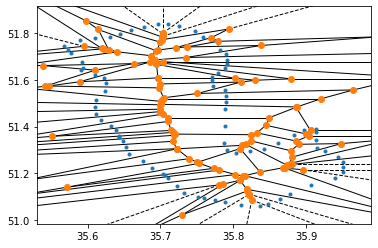

In [68]:
voronoi_diagram = Voronoi(tehran_district_border[['Latitude', 'Longitude']].values)
voronoi_plot_2d(voronoi_diagram)
plt.show()

### Section Info

Here a voronoi diagram is drawn based on Tehran city border points as generator points for voronoi diagram, these points are presented as blue dots. Orange dots represent voronoi vertices and voronoi edges are shown as black lines between these vertices.</br>
By looking at these vertices, we can observe that some of them are scattered with nice distribution inside Tehran city. These points can represnet areas inside Tehran city which can be used to get distances of different areas in Tehran city from Earthquake points.

### 5.5.3 Acquire Voronoi Vertices

In [69]:
voronoi_vertices = voronoi_diagram.vertices
#voronoi_vertices

### Section Info

This section acquires voronoi vertices which represent different areas in Tehran city.

### 5.5.4 Acquire Voronoi Ridge Connections

In [70]:
ridge_connections = voronoi_diagram.ridge_vertices
#ridge_connections

### Section Info

This section acquires connections (edges) between voronoi vertices. This part is used for drawing voronoi diagram on map.

### 5.5.5. Plot Voronoi Diagram On Folium Map

In [71]:
voronoimap_1 = folium.Map(location=[35.75,51.5], tiles='Stamen Terrain', zoom_start=10)

GeoJson(tehran_city).add_to(voronoimap_1)

for vertice in voronoi_vertices:
    folium.Circle(
        [vertice[0], vertice[1]], color="red", radius=500
    ).add_to(voronoimap_1)
    
for connection in ridge_connections:
    
    pointA_index = connection[0]
    pointB_index = connection[1]

    latA = voronoi_vertices[pointA_index][0]
    longA = voronoi_vertices[pointA_index][1]

    latB = voronoi_vertices[pointB_index][0]
    longB = voronoi_vertices[pointB_index][1]

    loc = [(latA, longA),(latB, longB)]

    folium.PolyLine(loc, color='blue', weight=1, opacity=0.8).add_to(voronoimap_1)
    
#PlotEarthquakes(voronoimap_1)

voronoimap_1

### Section Info

In this part we plot vornoi diagram which we created in section 5.5.2 on a terrain map of Tehran city. 

#### Map Info

- Light blue curve which is also filled in light blue, represents Tehran city province and its turning points are voronoi dioagram's generating points
- Red dots are voronoi vertices acquired from section 5.5.3
- Blue lines are voronoi edges which are acquired from section 5.5.4


### 5.5.6. Find Voronoi Vertices Inside Tehran City Province

In [72]:
tehran_district_border

Latitude  Longitude
0   35.643517  51.357204
1   35.647980  51.336388
2   35.653183  51.310368
3   35.656651  51.282612
4   35.675732  51.253124
..        ...        ...
80  35.618488  51.428326
81  35.632366  51.400570
82  35.639305  51.383224
83  35.642776  51.360672
84  35.643517  51.357204

[85 rows x 2 columns]

In [73]:
interior_voronoi_vertices = []

tehran_geometry = tehran_city.values[0][0]

for p in voronoi_vertices:
    point = Point(p[1],p[0])
    if tehran_geometry.contains(point):
        interior_voronoi_vertices.append(p)

#interior_voronoi_vertices

In [74]:
interior_voronoi_vertices = pd.DataFrame(interior_voronoi_vertices, columns = ['Latitude', 'Longitude'])
interior_voronoi_vertices

Latitude  Longitude
0   35.702875  51.798447
1   35.703487  51.801051
2   35.871647  51.221092
3   35.895290  51.214962
4   35.739624  51.262196
..        ...        ...
77  35.698081  51.565835
78  35.699273  51.582714
79  35.694619  51.666659
80  35.696641  51.608670
81  35.696961  51.606993

[82 rows x 2 columns]

### Section Info

Here the vertices (red dots on previous map) which are located inside Tehran city district are filtered from the rest.

### 5.5.7. Plot Voronoi Vertices Inside Tehran City Province

In [75]:
voronoimap_2 = folium.Map(location=[35.75,51.5], tiles='Stamen Terrain', zoom_start=10)

GeoJson(tehran_city).add_to(voronoimap_2)


for vertice in interior_voronoi_vertices.values:
    folium.Circle(
        [vertice[0], vertice[1]], color="red", radius=500
    ).add_to(voronoimap_2)
    
#PlotEarthquakes(voronoimap_2)

voronoimap_2

### Section Info

This part plots the map with Tehran city district borders and the voronoi vertices inside of it

#### Map Info

- Light blue curve which is also filled in light blue, represents Tehran city province
- Red dots are voronoi vertices inside Tehran city which are acquired from section 5.5.6


### 5.5.8. Find Distance of Each Voronoi Vertice Inside Tehran City Province From Eeach Earthquake Point

In [76]:
distance_matrix = []

for i in df_all_final.values:
    
    distance_row = []
    
    for j in interior_voronoi_vertices.values:
        
        distance_row.append(GetDistance(i[1], i[2], j[0], j[1]))
    
    distance_matrix.append(distance_row)

distance_matrix = np.array(distance_matrix)
    
distance_matrix

array([[ 24.01795661,  23.77449823,  74.93899244, ...,  35.5753104 ,
         40.57351055,  40.71201829],
       [ 21.41535925,  21.17370731,  72.0632613 , ...,  32.84497831,
         37.8034402 ,  37.94043458],
       [259.37732992, 259.1570395 , 289.53442604, ..., 268.93145403,
        272.78895308, 272.88261455],
       ...,
       [ 23.43350492,  23.19031963,  74.31312788, ...,  34.96895408,
         39.96021437,  40.09845625],
       [265.89887451, 266.0671968 , 211.67913944, ..., 256.18438793,
        251.62926986, 251.48231466],
       [327.05513645, 327.21680842, 273.26716378, ..., 317.5877182 ,
        313.11783136, 312.97254355]])

In [77]:
distance_matrix.shape

(87, 82)

In [78]:
distance_matrix_df = pd.DataFrame(distance_matrix, columns = interior_voronoi_vertices.index)
distance_matrix_df

0           1           2           3           4           5   \
0    24.017957   23.774498   74.938992   75.860608   70.826168   72.132771   
1    21.415359   21.173707   72.063261   72.996182   67.953006   69.254230   
2   259.377330  259.157040  289.534426  288.592464  294.677059  295.088202   
3    74.848580   74.621739  129.260102  130.350793  123.442530  124.946329   
4    90.333847   90.385649   61.306676   58.791389   75.523363   74.379811   
..         ...         ...         ...         ...         ...         ...   
82   20.737583   20.493206   72.581175   73.588508   68.012961   69.357304   
83   23.783868   23.539640   75.152919   76.103383   70.863384   72.186664   
84   23.433505   23.190320   74.313128   75.237958   70.195918   71.501846   
85  265.898875  266.067197  211.679139  209.798984  222.992013  221.130866   
86  327.055136  327.216808  273.267164  271.321945  284.852766  282.987271   

            6           7           8           9   ...          72  \
0    76.004826   74.717096   73.815972   83.235088  ...   33.438008   
1    73.118061   71.840067   70.941933   80.345766  ...   31.107262   
2   292.852018  289.585082  288.403436  300.112434  ...  269.798085   
3   129.979899  129.012518  128.171500  136.932034  ...   80.363925   
4    65.340128   61.648155   60.877327   68.820096  ...   95.928591   
..         ...         ...         ...         ...  ...         ...   
82   73.515928   72.347706   71.473245   80.671231  ...   30.020731   
83   76.172619   74.927028   74.034890   83.375719  ...   33.045259   
84   75.375329   74.090843   73.190604   82.604302  ...   32.907235   
85  212.581877  212.029134  212.514375  207.663800  ...  265.585721   
86  274.294706  273.624106  274.072881  269.530044  ...  327.096438   

            73          74          75          76          77          78  \
0    34.380822   34.828998   47.922810   45.564492   44.302661   42.786259   
1    32.217442   32.109245   45.108341   42.696075   41.511880   39.999433   
2   271.137429  268.396392  278.207342  273.697409  275.670179  274.407653   
3    79.480687   85.797031   99.621392   98.489079   95.734317   94.223633   
4    99.111780   86.606799   81.330024   76.734014   82.964344   83.254406   
..         ...         ...         ...         ...         ...         ...   
82   30.946365   31.652773   44.904046   42.741476   41.233422   39.710481   
83   33.916755   34.670762   47.858013   45.593435   44.209930   42.689620   
84   33.883179   34.224518   47.301859   44.934839   43.685785   42.170046   
85  268.068811  256.949948  244.670347  243.308382  248.284239  249.495022   
86  329.635383  318.342417  306.265745  304.740363  309.833984  311.015893   

            79          80          81  
0    35.575310   40.573511   40.712018  
1    32.844978   37.803440   37.940435  
2   268.931454  272.788953  272.882615  
3    86.623382   91.863678   92.017427  
4    86.185149   84.225064   84.144861  
..         ...         ...         ...  
82   32.412752   37.468319   37.609400  
83   35.425909   40.459689   40.599715  
84   34.968954   39.960214   40.098456  
85  256.184388  251.629270  251.482315  
86  317.587718  313.117831  312.972544  

[87 rows x 82 columns]

### Section Info

In this section a distances matrix is created based on the distances of each vertice inside Tehran city province and earthquake points.

columns represent vertices inside tehran propvince and rows represent earthquake points. Each cell contains the distance between its earthquake point (row) and voronoi vertice (column).

### 5.5.9. Find Minimum Distance Between Each Vertice and Earthquake Point

In [79]:
minimum_distances = distance_matrix_df.min(axis=1)
minimum_distances

0      23.774498
1      21.173707
2     256.051060
3      74.621739
4      57.090183
         ...    
82     20.493206
83     23.539640
84     23.190320
85    204.416287
86    266.315301
Length: 87, dtype: float64

In [80]:
minimum_distances_index = distance_matrix_df.idxmin(axis=1)
minimum_distances_index

0      1
1      1
2     57
3      1
4     42
      ..
82     1
83     1
84     1
85    17
86    17
Length: 87, dtype: int64

In [81]:
minimum_distances_df = pd.DataFrame([], columns=['Minimum Distance', 'Voronoi Vertice Index'])
minimum_distances_df['Minimum Distance'] = minimum_distances.values
minimum_distances_df['Voronoi Vertice Index'] = minimum_distances_index.values
minimum_distances_df

Minimum Distance  Voronoi Vertice Index
0          23.774498                      1
1          21.173707                      1
2         256.051060                     57
3          74.621739                      1
4          57.090183                     42
..               ...                    ...
82         20.493206                      1
83         23.539640                      1
84         23.190320                      1
85        204.416287                     17
86        266.315301                     17

[87 rows x 2 columns]

### Section Info

Minimum distance between each pair of vertices and earthquake points is obtained in this section. Index column is earthquake index, second column holds the distance value and third column is the voronoi vertice index which the earthquake is close to.

### 5.5.10. Get Top-5 Maximum Of Minimum Distances

In [82]:
max_minimum_distances_df = minimum_distances_df.sort_values(by='Minimum Distance',ascending=False).head(5)
max_minimum_distances_df = max_minimum_distances_df.reset_index().rename(columns={'index':"Earthquake Index"})
max_minimum_distances_df

Earthquake Index  Minimum Distance  Voronoi Vertice Index
0                76        332.840611                     17
1                62        328.910971                     17
2                86        266.315301                     17
3                 2        256.051060                     57
4                85        204.416287                     17

### Section Info

The goal of this section is to sort minimum distances by their distance value and in descending order. This way we get the maximum of minimum distances.

<font color='red' weight='bold'>Note: </font>The reason behind having top-5 of this list as plot data is that there are few colors available for both circle and polyline layers. So if you want to see more points on the map you can use your own color assigner method or just paint them the same color and use their rank value in tooltip to identify them.

### 5.5.11. Plot Top-5 Maximum Of Minimum Distances

In [83]:
def color_assign(rank):
    color_list1 = ['darkgreen', 'green', ' yellow', 'orange', 'red']
    return color_list1[int(rank)]

def voronoi_color_assign(VoronoiVerticeIndex):
    if VoronoiVerticeIndex == 57:
        return 'blue'
    elif VoronoiVerticeIndex == 17:
        return 'purple'

In [84]:
voronoimap_3 = folium.Map(location=[36,51.5], tiles='Stamen Terrain', zoom_start=9)

GeoJson(tehran_city).add_to(voronoimap_3)

for distance in max_minimum_distances_df.reset_index().values:
    
    EQ_index = int(distance[1])
    VV_index = int(distance[3])
    dist = distance[2]
    
    latVV = interior_voronoi_vertices.values[VV_index][0]
    longVV = interior_voronoi_vertices.values[VV_index][1]
    
    latEQ = df_all_final.values[EQ_index][1]
    longEQ = df_all_final.values[EQ_index][2]
    radEQ = df_all_final.values[EQ_index][4]
    
    folium.Marker([latVV,longVV], icon=folium.Icon(color=voronoi_color_assign(VV_index))).add_to(voronoimap_3)

    folium.Circle([latEQ, longEQ], tooltip = '<b>Rank: </b>' + str(distance[0] + 1), color=color_assign(distance[0]), radius=(radEQ * 4000)).add_to(voronoimap_3)
    
    loc = [(latEQ, longEQ),(latVV, longVV)]
    
    folium.PolyLine(loc, color=color_assign(distance[0]), weight=3, opacity=0.8).add_to(voronoimap_3)
    
voronoimap_3

### Section Info

This part consists of following parts:

- Defining a method for color assignment which applies on both circle and polyline, related to each earthquake point.
- Defining a method for voronoi vertice color assignment which paints their markers based on their IDs.
- Plotting the map for maximum of minimum distances between earthquake points and voronoi vertices (area points) in Tehran city district.

#### Map Info

- Light blue curve which is also filled in light blue, represents Tehran city province
- Blue and purple markers with 'i' icon which represent the voronoi vertices in top-5 maximum of minimum distances
- Circles with colors ranged from darkgreen to red (rainbow order) that represent earthquake points based on their distances from their respective voronoi vertice in Tehran city
- Lines that are drawn from each earthquake point (same color as earthquake circle) to their respective voronoi vertice in Tehran city
- The closer the earthquake to its voronoi point, the more prone to red its color is. (red is the least distance in top-5 list and green is the most distance)
- Each circle's radius shows the magnitude scale of earthquake point
- Hovering your mouse over earthquake points provides the rank of the distance of that particular earthquake point to its respective voronoi vertice

As can be seen, there are two voronoi vertices in top-5 list that have maximum of minimum distances from earthquake points. There is only one eartquake point (with rank = 4) that is connected to blue voronoi vertice (index = 57). The rest are conected to the purple voronoi vertice (index = 17). This can be a side effect of merging both earthquake databases. Nonetheless they should be considered in current matter.

# 6. Beneficial Location For a New Station

## 6.1. Create Perimeter of 50Km Radius For Each Station

In [85]:
circles_St = []
for St in df_stations.values:
    
    if(St[2] == 'Tehran'):
        
        circle_center = Point(St[4], St[3])
        St_buffer = circle_center.buffer(1, cap_style=1, resolution=100)
        St_buffer = shapely.affinity.scale(St_buffer, 0.5, 0.4)
        circles_St.append(St_buffer)
    
circles_St = gpd.GeoDataFrame(circles_St, columns=['geometry'])

circles_St.crs = "EPSG:4326"

circles_St

geometry
0   POLYGON ((52.53200 35.57700, 52.53194 35.57072...
1   POLYGON ((53.25400 35.64200, 53.25394 35.63572...
2   POLYGON ((50.71800 36.38600, 50.71794 36.37972...
3   POLYGON ((51.77600 35.43800, 51.77594 35.43172...
4   POLYGON ((51.16700 35.68500, 51.16694 35.67872...
5   POLYGON ((51.56300 34.84200, 51.56294 34.83572...
6   POLYGON ((50.42900 35.40500, 50.42894 35.39872...
7   POLYGON ((52.74100 34.35200, 52.74094 34.34572...
8   POLYGON ((51.88900 35.75200, 51.88894 35.74572...
9   POLYGON ((52.22700 34.99500, 52.22694 34.98872...
10  POLYGON ((51.88700 35.74600, 51.88694 35.73972...

### Section Info

This section creates a list of circles with 50Km radius which their centers are the stations. These buffers are modified a bit to look more like a circle than oval. The list has been changed to GeoDataFrame for furthur usages.

## 6.2. Plot Perimeter Of Each Station And Tehran Province

In [86]:
choroplethmap_6 = folium.Map(location=[36,51], tiles='Stamen Terrain', zoom_start=7)

Choropleth(geo_data=districts_tehran.__geo_interface__,
           data=plot_dict_both, 
           key_on="feature.id", 
           fill_color='YlOrRd', 
           legend_name='Number of Minimum Distances to Earthquakes'
          ).add_to(choroplethmap_6)

GeoJson(circles_St).add_to(choroplethmap_6)

folium.vector_layers.Polygon(vers, popup=tehran_province.index[0] + ' Province', color='yellow').add_to(choroplethmap_6)

PlotStations(choroplethmap_6, 'Tehran')

choroplethmap_6

### Section Info

This section displays the choroplethmap from previous section without district ceontroid markers, earthquake points and their connections. Beside this, the district of Tehran province is displayed on map. The most important layer added to this map, is the layer of circles that shows 50 Km of coverage for each station.


#### Map Info

- All infos from previous section except for earthquake points, district centroid and their connections apply on this map.
- Yellow line shows Tehran province district
- Blue circles show coverage of stations for earthquakes

## 6.3. Unification of Coverage Area of All Exisitng Stations

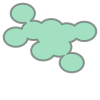

In [87]:
St_all_union = circles_St.geometry.unary_union
St_all_union

### Section Info

This part creates union of all coverage points from section 6.1. Difference of this part with Tehran province's convex hull will result in uncovered points.

## 6.4. Convex Hall Of Unification Of Tehran District

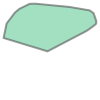

In [88]:
districts_conhull = districts_tehran.geometry.unary_union.convex_hull
districts_conhull

### Section Info

This part presents the convex hull of Tehran province districts which is actually bigger than the real geometry of Tehran province.

## 6.5. Areas Without Coverage Of Any Existing Stations

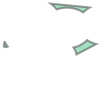

In [89]:
St_union_conv = circles_St.geometry.to_crs(epsg=4326).unary_union
non_St = districts_conhull.difference(St_union_conv)
non_St

### Section Info

Here we calculate the difference of convex hull for Tehran province and stations' coverage range.

## 6.6. Plot Areas Without Coverage

In [90]:
choroplethmap_7 = folium.Map(location=[36,51], tiles='Stamen Terrain', zoom_start=7)

Choropleth(geo_data=districts_tehran.__geo_interface__,
           data=plot_dict_both, 
           key_on="feature.id", 
           fill_color='YlOrRd', 
           legend_name='Number of Minimum Distances to Earthquakes'
          ).add_to(choroplethmap_7)

#GeoJson(circles_EQ).add_to(choroplethmap_7)

GeoJson(non_St).add_to(choroplethmap_7)

#folium.vector_layers.Polygon(vers, popup=tehran_province.index[0] + ' Province', color='blue').add_to(choroplethmap_7)

PlotStations(choroplethmap_7, 'Tehran')

choroplethmap_7

### Section Info

This map visualizes the choropleth map from prevois section, uncovered area of convex hull and stations from Tehran subnetwork.


#### Map Info

- Choropleth map shows number of minimum distances to earthquakes
- Blue line polygons show the uncovered areas of convex hull by Tehran subnetwork
- Existing stations of Tehran subnet are shown with blue markers and signal icon

## 6.7. Get Points Of Each Polygon in MultiPolygan Perimeter Resulted From 6.5.

In [91]:
points = []
for polygon in non_St:
    points.extend(polygon.exterior.coords[:-1])

points = pd.DataFrame(points, columns = ['Longitude', 'Latitude'])
points

Longitude   Latitude
0    50.785141  35.208477
1    50.784805  35.218483
2    50.801570  35.299771
3    50.806325  35.300844
4    50.808278  35.296610
..         ...        ...
239  52.584631  35.265648
240  52.592041  35.263566
241  52.599492  35.261577
242  52.606980  35.259683
243  52.613259  35.258180

[244 rows x 2 columns]

### Section Info

This section as its described on the header, get points of each polygon in multipolygan perimeter resulted from section 6.5 and saves them to a DataFrame for distance usages.

## 6.8. Get Distance Of Points Of Each Polygon in MultiPolygan Perimeter From Earthquake Points

In [92]:
distance_matrix = []

for EQ in df_all.values:
    
    distance_row = []
    
    for point in points.values:
        
        distance_row.append(GetDistance(EQ[1], EQ[2], point[1], point[0]))
    
    distance_matrix.append(distance_row)

distance_matrix = np.array(distance_matrix)


distance_matrix_df = pd.DataFrame(distance_matrix, columns = points.index)
distance_matrix_df

0           1           2           3           4           5    \
0   130.821091  130.300530  124.762142  124.321715  124.369605  124.428497   
1   128.356721  127.824783  122.204653  121.765144  121.818534  121.885160   
2   364.902239  364.222295  357.385654  356.972488  357.124648  357.326907   
3   173.003327  172.723714  168.980489  168.532934  168.467868  168.368619   
4   142.818226  141.780464  132.766179  132.503934  132.884521  133.408493   
..         ...         ...         ...         ...         ...         ...   
82  127.430370  126.914088  121.414748  120.973820  121.018606  121.073269   
83  130.472218  129.957894  124.467583  124.026612  124.071097  124.125255   
84  130.268649  129.745792  124.190990  123.750742  123.799727  123.860161   
85  233.665092  232.753768  226.511992  226.686827  227.165854  227.836418   
86  294.609432  293.728070  287.777881  287.968950  288.441511  289.103489   

           6           7           8           9    ...         234  \
0   124.480152  124.524566  124.561737  124.591662  ...   72.455382   
1   121.944636  121.996957  122.042120  122.080124  ...   74.394789   
2   357.519723  357.703062  357.876892  358.041183  ...  253.411693   
3   168.261114  168.145364  168.021380  167.889176  ...   39.890329   
4   133.926736  134.439191  134.945798  135.446501  ...  168.310412   
..         ...         ...         ...         ...  ...         ...   
82  121.120800  121.161197  121.194457  121.220581  ...   72.604576   
83  124.172182  124.211875  124.244332  124.269551  ...   71.709604   
84  123.913376  123.959369  123.998138  124.029680  ...   72.855410   
85  228.510469  229.187814  229.868259  230.551612  ...  348.493466   
86  289.769380  290.438994  291.112143  291.788639  ...  409.776368   

           235         236         237         238         239         240  \
0    73.085118   73.711344   74.333999   74.953023   75.568358   76.179946   
1    75.033821   75.669432   76.301556   76.930127   77.555082   78.176356   
2   253.332369  253.243995  253.146585  253.040155  252.924721  252.800300   
3    40.065823   40.242477   40.420241   40.599066   40.778900   40.959696   
4   168.950726  169.586906  170.218842  170.846428  171.469556  172.088123   
..         ...         ...         ...         ...         ...         ...   
82   73.249142   73.890402   74.528290   75.162739   75.793684   76.421059   
83   72.341583   72.970094   73.595079   74.216475   74.834225   75.448270   
84   73.487338   74.115774   74.740658   75.361929   75.979526   76.593391   
85  349.196644  349.898330  350.598357  351.296563  351.992787  352.686866   
86  410.476513  411.174879  411.871301  412.565616  413.257664  413.947283   

           241         242         243  
0    76.787729   77.391651   77.892256  
1    78.793889   79.407618   79.916466  
2   252.666913  252.524578  252.398217  
3    41.141402   41.323971   41.476227  
4   172.702026  173.311163  173.815402  
..         ...         ...         ...  
82   77.044803   77.664851   78.179066  
83   76.058552   76.665015   77.167776  
84   77.203465   77.809691   78.312231  
85  353.378643  354.067958  354.641034  
86  414.634315  415.318602  415.887245  

[87 rows x 244 columns]

### Section Info

Here the distances of each perimeter point from earthquake points are calculated to check which perimeter point is closer to given earthquake points. The dataframe created in this section is matrix distances of perimeter points (presented as columns) and eartquake points (peresented as rows).

## 6.9. Number Of Earthquakes In 25Km Range For Each Perimeter Point

In [93]:
EQs_in_range_list = []
for i in distance_matrix_df.columns:
    
    EQs_in_range_list.append([i, distance_matrix_df[distance_matrix_df[i] < 25].shape[0]])
    
EQs_in_range_df = pd.DataFrame(EQs_in_range_list, columns=['index', 'EQs In Range']).set_index('index')
EQs_in_range_df

EQs In Range
index              
0                 0
1                 0
2                 0
3                 0
4                 0
...             ...
239               0
240               0
241               0
242               0
243               0

[244 rows x 1 columns]

In [94]:
merged_points = points.copy()
merged_points = merged_points.join(EQs_in_range_df)
merged_points

Longitude   Latitude  EQs In Range
0    50.785141  35.208477             0
1    50.784805  35.218483             0
2    50.801570  35.299771             0
3    50.806325  35.300844             0
4    50.808278  35.296610             0
..         ...        ...           ...
239  52.584631  35.265648             0
240  52.592041  35.263566             0
241  52.599492  35.261577             0
242  52.606980  35.259683             0
243  52.613259  35.258180             0

[244 rows x 3 columns]

### Section Info

This section tries to calculate and provide a list of all perimeter points with the number of all earthquakes in their 25 Km radius vicinity. the list is then turned into a normal indexed DataFrame which is used in next section.

## 6.10. Top-20 Perimeter Points With Most Earthquakes In 25 Km Range 

In [95]:
most_coverage_df = merged_points.sort_values(by='EQs In Range', ascending=False).reset_index()
most_coverage_df = most_coverage_df.head(20)
most_coverage_df

index  Longitude   Latitude  EQs In Range
0      86  52.117965  35.971044            50
1     101  52.000605  35.976211            50
2      87  52.110217  35.972075            50
3      88  52.102451  35.973009            50
4      89  52.094667  35.973846            50
5      90  52.086867  35.974584            50
6      91  52.079054  35.975225            50
7      92  52.071230  35.975767            50
8      93  52.063395  35.976211            50
9      94  52.055553  35.976556            50
10     95  52.047705  35.976803            50
11     96  52.039854  35.976951            50
12     97  52.032000  35.977000            50
13     99  52.016295  35.976803            50
14    100  52.008447  35.976556            50
15     98  52.024146  35.976951            50
16    104  51.977133  35.974584            48
17    103  51.984946  35.975225            48
18    102  51.992770  35.975767            48
19     85  52.125691  35.969915            48

### Section Info

This section gets the list from previous section and keeps the index of previous list while sorting the list to get top-20 perimeter points which have the most amount of earthquakes covered. We can see the result at the end of the section.

## 6.11. Plot Best Points For Establishing New Station

In [96]:
choroplethmap_8 = folium.Map(location=[36,51], tiles='Stamen Terrain', zoom_start=7)

Choropleth(geo_data=districts_tehran.__geo_interface__,
           data=plot_dict_both, 
           key_on="feature.id", 
           fill_color='YlOrRd', 
           legend_name='Earthquake Frequency of Tehran'
          ).add_to(choroplethmap_8)

for item in most_coverage_df.values:
        popup_text = '<b>Latitude: </b>' + str(item[2]) + '</br>' \
        + '<b>Longitude: </b>' + str(item[1]) + '</br>' \
        + '<b>EQs In 25Km Vicinity: </b>' + str(item[3])
        folium.Marker(
            [item[2], item[1]], popup=popup_text , tooltip='<b>EQs In 25Km Vicinity: </b>' + str(item[3]), icon=folium.Icon(color='orange', icon='flash')
        ).add_to(choroplethmap_8)

GeoJson(non_St).add_to(choroplethmap_8)


PlotStations(choroplethmap_8, 'Tehran')
PlotEarthquakes(choroplethmap_8)

choroplethmap_8

### Section Info

This map visualizes the choropleth map from prevois section, uncovered area of convex hull, stations from Tehran subnetwork, earthquake points and top-20 perimeter points from previous section. These locations as shown on the map seem like nice places to build a new station as they cover the biggest uncovered part and the part with most earthquakes in range (Damavand Vicinity) so these points are good places to recommend for establishing new station for tehran subnetwork.


#### Map Info

- Choropleth map shows number of minimum distances to earthquakes
- Blue line polygons show the uncovered areas of convex hull by Tehran subnetwork
- Existing stations of Tehran subnet are shown with blue markers and signal icon
- Earthquake points are shown as in previous parts in blue and red circles. (PlotEarthquakes Method)
- Orange markers with flash icon show the top-20 places that are recommended to establish a new station.